In [11]:
import heapq

# Define the grid size
ROWS, COLS = 5, 5

# Directions for moving: right, left, down, up
DIRECTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0)]

class Node:
    def __init__(self, row, col):
        self.row, self.col = row, col
        self.g = float("inf")  # Cost from start to current node
        self.h = 0  # Heuristic cost to goal
        self.f = float("inf")  # Total cost
        self.parent = None  # Parent node for path tracking

    def __lt__(self, other):
        return self.f < other.f  # Comparison for priority queue

def heuristic(a, b):
    """ Manhattan Distance heuristic """
    return abs(a.row - b.row) + abs(a.col - b.col)

def a_star(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))  # Push start node
    start.g, start.h, start.f = 0, heuristic(start, goal), heuristic(start, goal)

    while open_set:
        current = heapq.heappop(open_set)[1]

        # Goal reached
        if current == goal:
            path = []
            while current:
                path.append((current.row, current.col))
                current = current.parent
            return path[::-1]  # Reverse path

        # Check neighbors
        for dr, dc in DIRECTIONS:
            r, c = current.row + dr, current.col + dc
            if 0 <= r < ROWS and 0 <= c < COLS:  # Within bounds
                neighbor = grid[r][c]
                temp_g = current.g + 1

                if temp_g < neighbor.g:  # Found a better path
                    neighbor.g, neighbor.h = temp_g, heuristic(neighbor, goal)
                    neighbor.f = neighbor.g + neighbor.h
                    neighbor.parent = current
                    heapq.heappush(open_set, (neighbor.f, neighbor))

    return None  # No path found

# Create grid
grid = [[Node(r, c) for c in range(COLS)] for r in range(ROWS)]
start, goal = grid[0][0], grid[ROWS - 1][COLS - 1]

# Run A* Algorithm
path = a_star(grid, start, goal)

# Print the path
if path:
    print("Path found:", path)
else:
    print("No path found")


Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)]


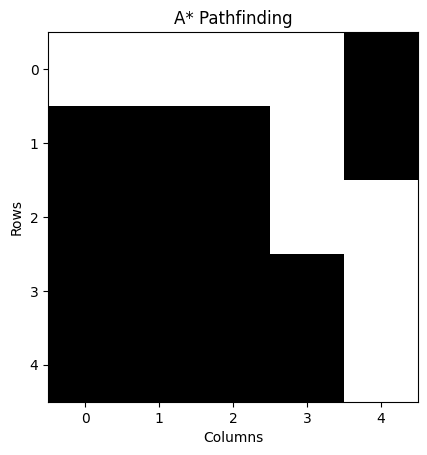

In [12]:
# prompt: visualize it

import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Visualize the grid and path
if path:
    grid_visualization = [[0 for _ in range(COLS)] for _ in range(ROWS)]
    for r, c in path:
        grid_visualization[r][c] = 1  # Mark path

    plt.imshow(grid_visualization, cmap='gray')
    plt.title('A* Pathfinding')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()
else:
    print("No path found, cannot visualize.")
